In [29]:
import numpy as np
import tensorflow as tf
import flowpm


In [30]:
def fde(cosmo,a,epsilon=1e-5):
    a=tf.convert_to_tensor(a,dtype=tf.float32)
    w0=tf.convert_to_tensor(cosmo["w0"],dtype=tf.float32)
    wa=tf.convert_to_tensor(cosmo["wa"],dtype=tf.float32)
    return (-3*(1+w0)+
            3*wa*((a-1)/tf.math.log(a-epsilon)-1))

In [31]:
cosmo={"w0":-1.0,"wa":0.1,}

In [32]:
def w(a):

    return w0-wa(a-1)


In [33]:
def E(a):
    return(tf.math.sqrt(
        Omega0_m/tf.pow(a, 3)
        +Omega0_k/tf.pow(a, 2)
        +Omega0_de*tf.pow(a, fde(a))))

In [34]:
x=np.linspace(0.1,1)

In [35]:
tf.convert_to_tensor(x)

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46734694, 0.48571429, 0.50408163, 0.52244898, 0.54081633,
       0.55918367, 0.57755102, 0.59591837, 0.61428571, 0.63265306,
       0.65102041, 0.66938776, 0.6877551 , 0.70612245, 0.7244898 ,
       0.74285714, 0.76122449, 0.77959184, 0.79795918, 0.81632653,
       0.83469388, 0.85306122, 0.87142857, 0.88979592, 0.90816327,
       0.92653061, 0.94489796, 0.96326531, 0.98163265, 1.        ])>

In [36]:
tf.convert_to_tensor(cosmo["w0"])

<tf.Tensor: shape=(), dtype=float32, numpy=-1.0>

In [37]:
fde(cosmo,x)

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.18274559, -0.17606185, -0.1698455 , -0.16399935, -0.15845558,
       -0.15316468, -0.14808929, -0.14320028, -0.13847458, -0.1338935 ,
       -0.12944157, -0.12510596, -0.12087579, -0.11674178, -0.11269593,
       -0.10873134, -0.10484189, -0.10102226, -0.09726761, -0.09357382,
       -0.08993701, -0.08635385, -0.08282118, -0.07933626, -0.0758965 ,
       -0.0724996 , -0.0691434 , -0.06582599, -0.06254551, -0.05930034,
       -0.05608891, -0.0529098 , -0.04976169, -0.04664331, -0.04355353,
       -0.04049131, -0.03745558, -0.03444546, -0.03146008, -0.02849867,
       -0.02556047, -0.02264486, -0.01975132, -0.01687954, -0.01402938,
       -0.01120146, -0.00839791, -0.00562633, -0.00292708, -0.3       ],
      dtype=float32)>

Populating the interactive namespace from numpy and matplotlib


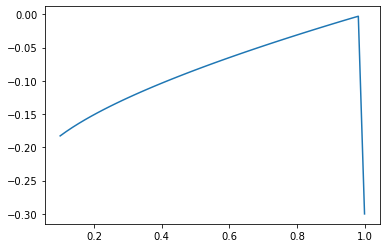

In [38]:
%pylab inline
plot(x,fde(cosmo,x))

In [11]:
def grad(w0,wa):
    cosmo={"w0":w0,"wa":wa,}
    why=fde(cosmo,a=0.5)
    print(why)
    erro=tf.math.pow(tf.convert_to_tensor(-0.10)-why,2)
    return erro
  
    

In [12]:
wt=tf.convert_to_tensor(0,dtype=tf.float32)

In [39]:
with tf.GradientTape() as g:
  g.watch(wt)
  l_tf = grad(-1, wt)

tf.Tensor(-0.0, shape=(), dtype=float32)


In [40]:
dl_dx_tf = g.gradient(l_tf, wt)

In [41]:
wt1=wt-dl_dx_tf

In [42]:
grad(-1, wt1)

tf.Tensor(-0.13978592, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=0.0015829189>